NAME : DHANUSHREE K G

#**CATS VS DOGS**

In [1]:
#Importing Libraries
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
#Data Preprocessing
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/projects_btech/1stopAI/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 8112 images belonging to 2 classes.


In [3]:
test_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/projects_btech/1stopAI/validation',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 4000 images belonging to 2 classes.


#Convolution Neural Network

In [4]:
#Initialize
cnn = tf.keras.models.Sequential()

In [5]:
#Convolution
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size=3, activation = 'relu', input_shape = [64,64,3]))

In [6]:
#Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides = 2))

In [7]:
#Convolution
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size=3, activation = 'relu'))

In [8]:
#Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides = 2))

In [9]:
#Flatten
cnn.add(tf.keras.layers.Flatten())

In [10]:
#Pool connection
cnn.add(tf.keras.layers.Dense(units = 128,activation = 'relu'))

In [11]:
#output layer
cnn.add(tf.keras.layers.Dense(units = 1,activation = 'sigmoid'))

In [12]:
#compile
cnn.compile(optimizer = 'adam',loss = 'binary_crossentropy', metrics = ['accuracy'])

#Training the dataset

In [13]:
history = cnn.fit(x = train_generator, validation_data = validation_generator, epochs = 5)

Epoch 1/5
254/254 [==============================] - 1981s 8s/step - loss: 0.6809 - accuracy: 0.5630 - val_loss: 0.6310 - val_accuracy: 0.6547
Epoch 2/5
254/254 [==============================] - 86s 340ms/step - loss: 0.6147 - accuracy: 0.6585 - val_loss: 0.5677 - val_accuracy: 0.7163
Epoch 3/5
254/254 [==============================] - 85s 336ms/step - loss: 0.5701 - accuracy: 0.7020 - val_loss: 0.5361 - val_accuracy: 0.7368
Epoch 4/5
254/254 [==============================] - 85s 335ms/step - loss: 0.5396 - accuracy: 0.7309 - val_loss: 0.5009 - val_accuracy: 0.7610
Epoch 5/5
254/254 [==============================] - 85s 335ms/step - loss: 0.5025 - accuracy: 0.7541 - val_loss: 0.5062 - val_accuracy: 0.7530


In [15]:
#make single prediciton
import numpy as np
from keras.preprocessing import image
test_image = image.load_img("/content/drive/MyDrive/projects_btech/1stopAI/img_158.jpg",target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
train_generator.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'


In [16]:
prediction

'dog'

In [17]:
import matplotlib.pyplot as plt
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


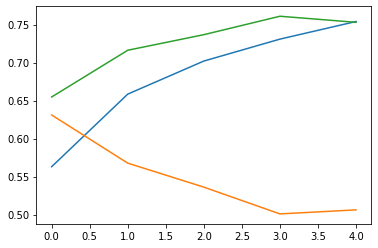

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])